## Data "validation" / sanity checking

In [2]:
!pwd

/c/Users/Mike/Dropbox/01 Purdue Thesis work/04 Experimental Study for Paper 2/data


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [91]:
scenario_designs = {
    0: 'design.csv',
    1: 'design_informed_uninformed.csv',
    2: 'design_concord_pa.csv',
    3: 'design_bots_humans.csv',
    4: 'design_stubborn_normal.csv',
}
scenario_filepaths = {
    1: 'master_trial_results.design_informed_uninformed.npy',
    2: 'master_trial_results.design_concord_pa.npy',
    3: 'master_trial_results.design_bots_humans.npy',
    4: 'master_trial_results.design_stubborn_normal.npy',
}
scenario_labels = {
    0: 'Base case',
    1: 'Informed/Uninformed',
    2: 'Concord/Partial Antagonism',
    3: 'Bots/Humans',
    4: 'Stubborn/Normal',    
}

###

scenario_num = 2
###

In [92]:
filepath = 'master_trial_results.npy'

filepath = scenario_filepaths[scenario_num]

In [93]:
# create hash of file for posterity
import hashlib
import pathlib

hashlib.md5(pathlib.Path(filepath).read_bytes()).hexdigest()

'8560da4db0853e66794d3965b2da1420'

In [94]:
data = np.load(filepath)
print(data.shape)

# assign the empty trial to nan to avoid confusion later
data[0] = np.nan

(379, 501, 6, 2)


In [95]:
# data = data[[0] + trial_nums_from_full_design_present_in_nonh_core]

the 0th entry on the first dimension is blank so that all trials are indexed by their trial number 1..1800

the 0th entry on the second dimension is the entropy value from agent initial conditions

the final dimension is [mean, standard deviation]

In [96]:
# a quick way to check that a time series does vary is the peak-to-peak value should be > 0
(np.ptp(data[1:, :, :, 0], axis=1) > 0).all()

True

In [97]:
trial_nums_from_full_design_present_in_nonh_core = [2, 5, 8, 17, 20, 23, 29, 32, 35, 38, 47, 50, 53, 59, 62, 65, 68, 77, 80, 83, 89, 92, 95, 98, 107, 110, 113, 119, 152, 155, 158, 167, 170, 173, 179, 182, 185, 188, 197, 200, 203, 209, 212, 215, 218, 227, 230, 233, 239, 242, 245, 248, 257, 260, 263, 269, 302, 305, 308, 317, 320, 323, 329, 332, 335, 338, 347, 350, 353, 359, 362, 365, 368, 377, 380, 383, 389, 392, 395, 398, 407, 410, 413, 419, 1202, 1205, 1208, 1217, 1220, 1223, 1229, 1232, 1235, 1238, 1247, 1250, 1253, 1259, 1262, 1265, 1268, 1277, 1280, 1283, 1289, 1292, 1295, 1298, 1307, 1310, 1313, 1319, 1352, 1355, 1358, 1367, 1370, 1373, 1379, 1382, 1385, 1388, 1397, 1400, 1403, 1409, 1412, 1415, 1418, 1427, 1430, 1433, 1439, 1442, 1445, 1448, 1457, 1460, 1463, 1469, 1502, 1505, 1508, 1517, 1520, 1523, 1529, 1532, 1535, 1538, 1547, 1550, 1553, 1559, 1562, 1565, 1568, 1577, 1580, 1583, 1589, 1592, 1595, 1598, 1607, 1610, 1613, 1619]

In [98]:
response_variable_labels = {
    0: 'relative entropy, binning (RE-B)',
    1: 'mutual information, binning (MI-B)',
    2: 'transfer entropy, binning (TE-B)',
    3: 'relative entropy, symbolic approach (RE-S)',
    4: 'mutual information, symbolic approach (MI-S)',
    5: 'transfer entropy, symbolic approach (TE-S)',
    }
response_variable_short_labels = {
    0: 'RE-B',
    1: 'MI-B',
    2: 'TE-B',
    3: 'RE-S',
    4: 'MI-S',
    5: 'TE-S',
    }
# array indexes
BINNING_RELATIVE  = 0
BINNING_MUTUAL    = 1
BINNING_TRANSFER  = 2
SYMBOLIC_RELATIVE = 3
SYMBOLIC_MUTUAL   = 4
SYMBOLIC_TRANSFER = 5

trial_counts = {
    0: len(trial_nums_from_full_design_present_in_nonh_core),
    1: 840,
    2: 378,
    3: 84,
    4: 672
}

MIN_TRIAL, MAX_TRIAL = 1, trial_counts[scenario_num]
MIN_T, MAX_T = 0, 500

INDEX_MEANS, INDEX_STDEV = 0, 1

## Data summary plots

I think it may be easiest to use one notebook for each RV

In [99]:
# plot styling
plt.style.use('seaborn-colorblind')


from my_plot import set_size, setup_mpl_for_latex
setup_mpl_for_latex()

textwidth = 390  ###

In [100]:


rv = 0  # just to select single response variable

print(data[MIN_TRIAL:, :, rv, INDEX_MEANS].min(), data[MIN_TRIAL:, :, rv, INDEX_MEANS].max())

0.6906548673476626 5.6724253419715644


In [101]:
# for transfer entropy, need to truncate the last t;
# for symbolic entropy, need to truncate the last few t's
MAX_T = 490  ###

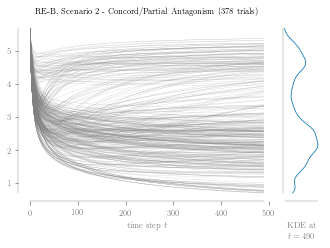

In [102]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=set_size(textwidth), gridspec_kw={'width_ratios': [7, 1], 'wspace': 0.05}, sharey=True)


for i in range(MIN_TRIAL, MAX_TRIAL+1):
#     if scenario_num == 4:
#         color = scn_4_colors[float(design_dfs[4].loc[i, 'fraction_stubborn'])]
#     ax1.plot(data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color=color, linewidth=0.15, alpha=0.75)

    ax1.plot(data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.15, alpha=0.75)
#     ax1.plot(data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.1, alpha=1)

#     break ###

ax1.set_title(f'{response_variable_short_labels[rv]}, Scenario {scenario_num} - {scenario_labels[scenario_num]} ({data.shape[0]-1} trials)')
ax1.set_xlabel('time step $t$', color='grey')

# more decoration
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_color('grey')

ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.spines['bottom'].set_bounds(MIN_T, MAX_T)
ax1.spines['left'].set_bounds(data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].min(), 
                              data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].max())


# in subplot 2, add KDE for final timestep data

# manually computing KDE so I can add it to a subplot
# from https://stackoverflow.com/a/4152016/5437547
from scipy.stats import gaussian_kde

density = gaussian_kde(data[MIN_TRIAL:, MAX_T, rv, INDEX_MEANS].reshape(1, -1))
xs = np.linspace(data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].min(), 
                 data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].max(), 200)
density.covariance_factor = lambda : .15
density._compute_covariance()
density_xs = density(xs)

ax2.plot(density_xs, xs, marker='', linewidth=0.75)

ax2.set_xlabel(f'KDE at\n$t={MAX_T}$', color='grey')

# more decoration
ax2.spines['bottom'].set_color('grey')
ax2.spines['left'].set_color('grey')
# ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_visible(False)

ax2.tick_params(axis='x', colors='None')

ax2.spines['left'].set_bounds(data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].min(), 
                              data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].max())
ax2.spines['bottom'].set_bounds(density_xs.min(), density_xs.max())

# want to make y-axis consistent across multiple plots, sometimes
ybound = ax1.get_ybound()


In [353]:
fig1.savefig(f'all_trials_line_plot_with_kde_rv_{rv}.pdf', format='pdf', bbox_inches='tight')

In [10]:
# sns.distplot(data[MIN_TRIAL:, -1:, rv, INDEX_MEANS].reshape(-1, 1));  # distribution of data at final time

# RQ 1 - DoE/ANOVA

In [103]:
# copied from code/experimental_design.py, edited to make population_size levels into strings


factors = dict(
    network_structure_model=[
        'erdos_renyi_random(N)',
        'small_world(N, 0.0, 3)',
        'small_world(N, 0.0, 10)',
        'small_world(N, 0.66, 3)',
        'small_world(N, 0.66, 10)',
        'scale_free(N, 1)',
        'scale_free(N, 5)',
    ],
    influence_model=[
        'standard_model',
        'similarity_bias',
        'attractive_repulsive',
        'random_adoption',
    ],
    influence_error_distribution=[
        'none',
        'N(0, 0.05)',
        'N(0, 0.1)',
    ],
    agent_activation_regime=[
        'synchronous',
        'random',
    ],
)


#### need to add scenario-specific factors

In [104]:
def split_dataframe_on_factor_into_levels(df, factor, col=None):
    """Helper function to return X separate data frames or columns by splitting a factor into its levels."""
    levels = df[factor].unique()
    
    if col:
        frames = (df[col][df[factor] == level] for level in levels)
    else:
        frames = (df[df[factor] == level] for level in levels)
    return frames

In [105]:
design_df = pd.read_csv(f'../code/{scenario_designs[scenario_num]}', index_col=0, dtype=str)


In [106]:
MAX_T = 490

In [107]:
rv = 0

In [108]:
df = pd.DataFrame(data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS])  # |TRIALS| x t_max
df.index = design_df.index

ddff = design_df.join(df)
ddff.head()

,agent_activation_regime,fraction_concord,fraction_left,influence_error_distribution,influence_model,network_structure_model,population_size,0,1,2,...,481,482,483,484,485,486,487,488,489,490
1,synchronous,0.25,0.0,none,standard_model,erdos_renyi_random(N),1000,5.672425,4.846015,4.387096,...,4.580001,4.579590,4.579180,4.578774,4.578359,4.577942,4.577525,4.577121,4.576713,4.576297
2,synchronous,0.25,0.0,none,standard_model,"small_world(N, 0.0, 3)",1000,5.672425,4.936355,4.572626,...,4.920640,4.921051,4.921457,4.921861,4.922262,4.922666,4.923072,4.923479,4.923883,4.924288
3,synchronous,0.25,0.0,none,standard_model,"small_world(N, 0.0, 10)",1000,5.672425,4.846885,4.389915,...,4.833540,4.833969,4.834399,4.834826,4.835256,4.835684,4.836114,4.836541,4.836965,4.837383
4,synchronous,0.25,0.0,none,standard_model,"small_world(N, 0.66, 3)",1000,5.672425,4.982305,4.637226,...,4.589549,4.589844,4.590136,4.590422,4.590703,4.590982,4.591256,4.591531,4.591806,4.592082
5,synchronous,0.25,0.0,none,standard_model,"small_world(N, 0.66, 10)",1000,5.672425,4.847155,4.391644,...,5.222684,5.222987,5.223287,5.223587,5.223889,5.224189,5.224488,5.224792,5.225092,5.225392


In [109]:
# ANOVA on the final ($t = 500$) data for single r.v.
# (this dataframe is handy for things other than ANOVA, so it's created up here)
anova_df = design_df.copy()
anova_df['response'] = data[MIN_TRIAL:, MAX_T, rv, INDEX_MEANS]

In [110]:
# DoE mean plot - data collection

label_map = dict(  # decorative strings for graphs
    agent_activation_regime='activation',
    influence_error_distribution='error',
    influence_model='influence model',
    network_structure_model='structure',
    population_size='$N$',
)


# means = []  # mean value for each factor-level
# stdevs = []
# for factor, levels in factors.items():
#     group_means = ddff.groupby(factor).mean()[MAX_T]
#     group_stdevs = ddff.groupby(factor).std()[MAX_T]
#     for level in levels:
#         means.append(group_means[level])
#         stdevs.append(group_stdevs[level])


In [111]:
# remove label overlap

# other resources
# https://stackoverflow.com/questions/8850142/matplotlib-overlapping-annotations
# https://matplotlib.org/users/transforms_tutorial.html

def fix_vertical_text_placement(labels, fig, ax, maxy):
    # modified from
    # https://medium.com/@adarshlilha/removing-label-overlapping-from-pretty-charts-8dd2e3581b71
    
    # pixel coordinates
    extents = [lab.get_window_extent(renderer=fig.canvas.get_renderer()) for lab in labels]
    anchors = [0.5*(extent.y0 + extent.y1) for extent in extents]  # vert.align centers

    cur_y_vals = anchors.copy()

    half_height = labels[0].get_size() / 2

    # S.A. params
    weight_overlap = 100
    weight_dist = 8
    max_move = half_height
    
    min_y = 0
    max_y = ax.transData.transform((0, maxy))[1]  #maxy given in data coords
    
    def energy(index):
        ener = 0

        # L1 norm
        dist = abs(cur_y_vals[index] - anchors[index])
        if dist > 0:
            ener += dist * dist * weight_dist  # making non-linear function to favor a balanced distance for label pairs

        y_index_top = cur_y_vals[index] + half_height
        y_index_bot = cur_y_vals[index] - half_height
        
        for i, extent in enumerate(extents):
            if i == index:  continue

            y_i_top = cur_y_vals[i] + half_height
            y_i_bot = cur_y_vals[i] - half_height

            y_overlap = max(0, min(y_index_top, y_i_top) - max(y_index_bot, y_i_bot))
            ener += y_overlap * weight_overlap

        return ener
    
    nsweeps = 2000
    
    # run loop
    currTemp = 1.0
    initialTemp = 1.0
    rej = 0
    
    for _ in range(nsweeps):
        for lab in labels:
            i = np.random.randint(0, len(labels))  # randomly select label index

            y_old = cur_y_vals[i]
            old_energy = energy(i)

            cur_y_vals[i] += (np.random.random() - 0.5) * max_move

            if cur_y_vals[i] < min_y or cur_y_vals[i] > max_y:
                # new move out of bounds
                cur_y_vals[i] = y_old
                delta_energy = 0
            else:
                new_energy = energy(i)
                delta_energy = new_energy - old_energy
                
            # randomly accept or reject new move
            if np.random.random() < np.exp(-delta_energy / currTemp):
                pass
            else:
                # reject move
                cur_y_vals[i] = y_old
                rej += 1
            
        currTemp = currTemp - (initialTemp / nsweeps)

    # apply new positions
    inv = ax.transData.inverted()
    for label, new_y in zip(labels, cur_y_vals):
        label.set_y(inv.transform((0, new_y))[1])

Scenario 4 [[ 1.         -0.12152953 -0.39740928]
 [-0.12152953  1.          0.95200405]
 [-0.39740928  0.95200405  1.        ]]


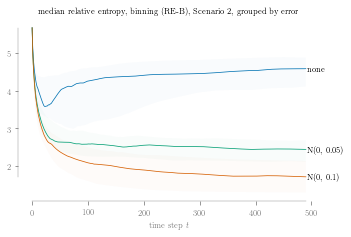

In [137]:
# time-series line plot, single RV, single design factor, grouped by level + level median line + 25-75 percentile shading

def make_median_entropy_plot(rv_num):  # NOT actually the rv_num, but the factor num
    factor = list(factors.keys())[rv_num]  # just doing single factor for now

    fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth))

    levels = factors[factor]
    
    return _make_median_entropy_plot(factor, levels, fig1, ax1)

    
def _make_median_entropy_plot(factor, levels, fig1, ax1):
    
    minval, maxval = 100, -100  # for setting vertical range frame
    linelabels = []

    lower_quantile, upper_quantile = .25, .75
    
    medians = dict()

    for level in levels:
        level_data = df.loc[design_df[factor] == level]
#         level_data = df.loc[design_df[factor] == level].filter(items=trial_nums_from_full_design_present_in_nonh_core)
        level_median = level_data.median()
        level_lower_quantile = level_data.quantile(lower_quantile)
        level_upper_quantile = level_data.quantile(upper_quantile)

        ax1.plot(level_median, marker='',  linewidth=0.75)
        linelabels.append(ax1.annotate(level.replace('_', '\_'), (level_median.index[-1]+1.5, level_median.iloc[-1]), 
                                       fontsize=8, ha='left', va='center', annotation_clip=False, color='black'))

        ax1.fill_between(level_median.index, level_lower_quantile, level_upper_quantile, alpha=0.025)

        # update extrema for vertical range frame
        minval = min(minval, level_median.min())
        maxval = max(maxval, level_median.max())
        
        medians[level] = level_median

    ax1.set_title(f'median {response_variable_labels[rv]}, Scenario {scenario_num}, grouped by {label_map.get(factor, factor.replace("_", " "))}')
    ax1.set_xlabel('time step $t$', color='grey')

    # more decoration
    ax1.spines['bottom'].set_color('grey')
    ax1.spines['left'].set_color('grey')

    ax1.tick_params(axis='x', colors='grey')
    ax1.tick_params(axis='y', colors='grey')

    ax1.spines['bottom'].set_bounds(MIN_T, MAX_T)
    ax1.spines['left'].set_bounds(minval, maxval)

    
    fix_vertical_text_placement(linelabels, fig1, ax1, maxval)

#     fig1.savefig(f'grouped_time_series_scenario_{scenario_num}_{factor}_rv_{rv}.pdf', format='pdf', bbox_inches='tight')

    return medians
    
# for i in range(5):
#     make_median_entropy_plot(i)


medians = make_median_entropy_plot(2)

# fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth))
# _make_median_entropy_plot('fraction_uninformed', [str(x) for x in [0.25, 0.33, 0.50, 0.66, 0.75]], fig1, ax1)
# _make_median_entropy_plot('fraction_stubborn', [str(x) for x in [0.05, 0.15, 0.33, 0.50]], fig1, ax1)
                  
                  
                  
# fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=set_size(textwidth, subplot=[2, 1]), sharey=True, sharex=True)                  
# _make_median_entropy_plot('fraction_concord', [str(x) for x in [0.25, 0.50, 0.75]], fig1, ax1)
# medians = _make_median_entropy_plot('fraction_left', [str(x) for x in [0.00, 0.25, 0.50]], fig1, ax2) 
                  
print(f'Scenario {i}', np.corrcoef(list(medians.values())))
# agent_activation_regime	fraction_concord	fraction_left	influence_error_distribution	influence_model	network_structure_model	population_size

In [637]:
fig1.savefig(f'grouped_time_series_scenario_{scenario_num}_{factor}_rv_{rv}.pdf', format='pdf', bbox_inches='tight')

In [27]:
legend2 = {'population_size': {'100': 'a', '1000': 'b', '10000': 'c'},
             'network_structure_model': {'erdos_renyi_random(N)': 'a',
              'small_world(N, 0.0, 3)': 'b',
              'small_world(N, 0.0, 10)': 'c',
              'small_world(N, 0.33, 3)': 'd',
              'small_world(N, 0.33, 10)': 'e',
              'small_world(N, 0.66, 3)': 'f',
              'small_world(N, 0.66, 10)': 'g',
              'scale_free(N, 1)': 'h',
              'scale_free(N, 3)': 'i',
              'scale_free(N, 5)': 'j'},
             'influence_model': {'standard_model': 'a',
              'similarity_bias': 'b',
              'attractive_repulsive': 'c',
              'random_adoption': 'd',
              'nonlinear': 'e'},
             'influence_error_distribution': {'none': 'a',
              'N(0, 0.05)': 'b',
              'N(0, 0.1)': 'c',
              'N(0, 0.2)': 'd'},
             'agent_activation_regime': {'synchronous': 'a',
              'uniform': 'b',
              'random': 'c'}}

In [28]:
# prepare plot data
import string
string.ascii_lowercase

cur_x = factor_start = factor_end = 0
xticks = []
xlabels = []
factor_name_xs = []
legend = []

for i, (factor, factor_levels) in enumerate(factors.items()):
    cur_x += 1  # add horizontal space before factor
    factor_start = cur_x
    
    for l, lvl in enumerate(factor_levels):
        xticks.append(cur_x)
        xlabels.append(legend2[factor][lvl])
        cur_x += 1

        legend.append( (factor, lvl, legend2[factor][lvl]))
                
#         # add some gaps between dissimilar models
        if factor == 'network_structure_model':
            if l in [0, 4]:
                cur_x += 0.6
                
        
    factor_end = cur_x
    factor_name_xs.append((label_map[factor], 0.5*(factor_end-1 + factor_start)))
    
    cur_x += 1  # add horizontal space after factor
    
# xticks, xlabels, 
# factor_name_xs, legend

In [29]:
# legend  ####### have to make this match base case

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


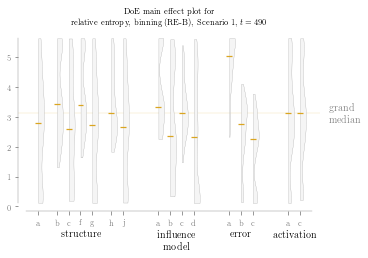

In [30]:
# DoE violin plot

fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth))

# assemble x tick labels
ax1.set_xticks(xticks)
ax1.set_xticklabels(xlabels)

grand_median = df.median().iloc[-1]
# grand_stdev = df.std().iloc[-1]
ax1.axhline(y=grand_median, color='goldenrod', linewidth=0.15, linestyle='-', zorder=0)
ax1.annotate('grand\nmedian', (xticks[-1]+2.5, grand_median), ha='left', va='center', annotation_clip=False, color='grey')

last_offset = 0
for i, (factor, levels) in enumerate(factors.items()):
    num_levels = len(levels)
    x = xticks[last_offset:last_offset+num_levels]
#     y = means[last_offset:last_offset+num_levels]
 
    groups = list(split_dataframe_on_factor_into_levels(anova_df, factor, col='response'))

#  Axes.violinplot(self, dataset, positions=None, vert=True, widths=0.5, 
# showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, *, data=None)
    try:
        v1 = ax1.violinplot(groups, positions=x, widths=1.0, showmeans=False, showmedians=True, showextrema=False)
    except ValueError:
        last_offset += num_levels
        continue
    
    last_offset += num_levels
    
    # make single-sided & adjust color
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_facecolor('whitesmoke')
        b.set_edgecolor('grey')
        b.set_linewidth(0.20)
        b.set_alpha(1)

    v1['cmedians'].set_color('goldenrod')
    v1['cmedians'].set_linewidth(1.25)

        
# label factor names
y = ax1.get_ybound()[0]
for label, x in factor_name_xs:
    ax1.annotate(label.replace(' ', '\n'), (x, y), 
                 fontsize=10,
                 textcoords="offset points", # how to position the text
                 xytext=(0,-18), # distance from text to points (x,y)
                 ha='center', va='top', annotation_clip=False)
    
ax1.set_title(f'DoE main effect plot for\n{response_variable_labels[rv]}, Scenario {scenario_num}, $t = {MAX_T}$')

# more decoration
ax1.spines['bottom'].set_color('grey')
ax1.spines['left'].set_color('grey')

ax1.tick_params(axis='x', colors='grey')
ax1.tick_params(axis='y', colors='grey')

ax1.spines['bottom'].set_bounds(xticks[0]-1, xticks[-1]+1)
ax1.spines['left'].set_bounds(anova_df['response'].min(), anova_df['response'].max())

# ax1.set_ylim(ybound);


In [19]:
fig1.savefig(f'doe_violin_plot_rv_{rv}.pdf', format='pdf', bbox_inches='tight')

In [30]:
design_df.head()

,agent_activation_regime,influence_error_distribution,influence_model,network_structure_model,population_size
1,synchronous,none,standard_model,erdos_renyi_random(N),100
2,synchronous,none,standard_model,erdos_renyi_random(N),1000
3,synchronous,none,standard_model,erdos_renyi_random(N),10000
4,synchronous,none,standard_model,"small_world(N, 0.0, 3)",100
5,synchronous,none,standard_model,"small_world(N, 0.0, 3)",1000


### ANOVA/statistical comparison

In [32]:
for factor in factors:
    print(factor, ":", stats.levene(*split_dataframe_on_factor_into_levels(anova_df, factor, col='response')))

network_structure_model : LeveneResult(statistic=8.981409987158575, pvalue=1.5918689412120022e-09)
influence_model : LeveneResult(statistic=53.77468444691, pvalue=8.693175290390104e-32)
influence_error_distribution : LeveneResult(statistic=14.717518509432413, pvalue=5.224992190986092e-07)
agent_activation_regime : LeveneResult(statistic=0.05031488699471939, pvalue=0.8225709278849055)


In [35]:
# make table for K-W test results
kw_data = np.zeros((len(factors), 2))

for i, factor in enumerate(factors.keys()):
#     print(factor, ":", stats.kruskal(*split_dataframe_on_factor_into_levels(anova_df, factor, col='response')))
    kw_cur_result = stats.kruskal(*split_dataframe_on_factor_into_levels(anova_df, factor, col='response'))
    kw_data[i, 0] = kw_cur_result.statistic
    kw_data[i, 1] = kw_cur_result.pvalue
    
kw_results = pd.DataFrame(kw_data, [label_map[factor] for factor in factors], ['test stat', 'p-value'])
print(kw_results.to_latex())
print(kw_results)

\begin{tabular}{lrr}
\toprule
{} &   test stat &        p-value \\
\midrule
structure       &   13.706690 &   3.308983e-02 \\
influence model &  243.647824 &   1.547534e-52 \\
error           &  465.882829 &  6.836424e-102 \\
activation      &    0.000809 &   9.773101e-01 \\
\bottomrule
\end{tabular}

                  test stat        p-value
structure         13.706690   3.308983e-02
influence model  243.647824   1.547534e-52
error            465.882829  6.836424e-102
activation         0.000809   9.773101e-01


C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


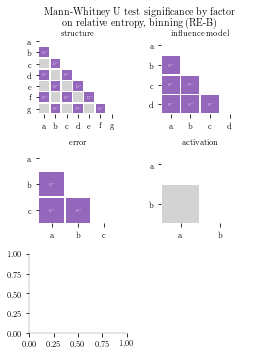

In [33]:
from itertools import combinations

from matplotlib import colors


def make_mann_whitney_heatmap(factor, ax, significance_level=0.05):
    # if the p-value is significant (< 0.05), we conclude the two groups are different
    grouped_data = list(split_dataframe_on_factor_into_levels(anova_df, factor, col='response'))
    levels = anova_df[factor].unique()
    
    pvals = np.full((levels.size, levels.size), np.nan)
    for i, li in enumerate(levels):
        for j, lj in enumerate(levels):
            if i > j:
                res = stats.mannwhitneyu(grouped_data[i], grouped_data[j])
                pvals[i, j] = res[1]
                
    significant = (pvals <= significance_level)
    significant[pvals == np.nan] = np.nan    
    
    cmap = colors.ListedColormap(['lightgrey', 'tab:purple'])
    cmap.set_bad('white',1.)
    bounds=[0,significance_level,1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
        
    masked_array = np.ma.array (significant, mask=np.isnan(pvals))
    
    # pcolormesh requires more +0.5'ing than imshow but avoids bug with minor grid alignment
    ax.pcolormesh(masked_array, edgecolors='w', linewidth=0.5, cmap=cmap, vmin=0, vmax=1)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    
    ax.set_title(label_map[factor].replace('_', ' '), size=8, y=0.91)

    # We want to show all ticks...
    ax.set_xticks(np.arange(levels.size)+0.5)
    ax.set_yticks(np.arange(levels.size)+0.5)
    
    # ... and label them with the respective list entries
    ax.set_xticklabels(string.ascii_lowercase[:levels.size])
    ax.set_yticklabels(string.ascii_lowercase[:levels.size])

    # hide spines
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    # Loop over data dimensions and create text annotations.
    for i, li in enumerate(levels):
        for j, lj in enumerate(levels):
            if significant[i, j]:
                text = ax.text(j+0.5, i+0.5, f"${int(pvals[i, j]*100)}^*$",
                               ha="center", va="center", color="w", fontsize=4)

    
fig, axes = plt.subplots(3, 2, figsize=set_size(textwidth, subplot=[3, 2]))

for factor, ax in zip(factors, axes.reshape(-1)):
    make_mann_whitney_heatmap(factor, ax)
#     break

axes[-1, -1].axis('off')

fig.suptitle(f'Mann-Whitney U test significance by factor\non {response_variable_labels[rv]}', size=10, x=0.370);
fig.tight_layout()
fig.subplots_adjust(top=0.90, right=0.65)


In [29]:
fig.savefig(f'mann_whitney_rv_{rv}.pdf', format='pdf', bbox_inches='tight')

## RQ 3

In [34]:
# for RQ 3, want to take correlation of each RV time series per trial, then look at distribution/take mean...


trial_corrs = np.full((MAX_TRIAL+1, 6, 6), np.nan)

for i in range(MIN_TRIAL, MAX_TRIAL+1):
    for j in range(6):
        for k in range(6):
            if j > k:
                trial_corrs[i, j, k] = np.corrcoef(data[i, MIN_T:MAX_T+1, (j, k), INDEX_MEANS])[0, 1]

print(trial_corrs[1], trial_corrs.shape)

[[        nan         nan         nan         nan         nan         nan]
 [-0.96961229         nan         nan         nan         nan         nan]
 [-0.99087643  0.98666597         nan         nan         nan         nan]
 [ 0.89435808 -0.81977932 -0.84780946         nan         nan         nan]
 [-0.85468758  0.81151016  0.83134234 -0.96722149         nan         nan]
 [-0.92434768  0.83018788  0.86787068 -0.9655887   0.87633098         nan]] (841, 6, 6)


(array([375.,  57.,  50.,  31.,  27.,  30.,  16.,  16.,  49., 189.]),
 array([-0.999663  , -0.81612954, -0.63259608, -0.44906262, -0.26552915,
        -0.08199569,  0.10153777,  0.28507123,  0.46860469,  0.65213815,
         0.83567161]),
 <a list of 10 Patch objects>)

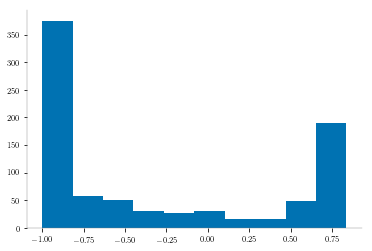

In [35]:
plt.hist(trial_corrs[1:, 1, 0])

C:\Users\Mike\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


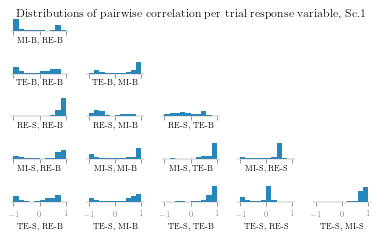

In [36]:
fig, axes = plt.subplots(5,5, figsize=set_size(textwidth, subplot=[5,5]), sharex=True, sharey=True)

bins = np.arange(-1, 1.2, 0.2)
bins[5] = 0

for j in range(1, 6):
    for k in range(6-1):
        ax = axes[j-1, k]
        
        if j > k:
            corr_data = trial_corrs[1:, j, k]
            weights = np.ones_like(corr_data)/corr_data.size
            ax.hist(corr_data, bins=bins, weights=weights, alpha=0.85)
            ax.set_xlabel(f'{response_variable_short_labels[j]}, {response_variable_short_labels[k]}', size=8)
            ax.get_yaxis().set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.tick_params(axis='x', colors='grey')
            
        else:
            ax.axis('off')

            
fig.suptitle(f'Distributions of pairwise correlation per trial response variable, Sc.{scenario_num}')
fig.tight_layout()

In [87]:
fig.savefig(f'all_rv_correlation_hist.pdf', format='pdf', bbox_inches='tight')    

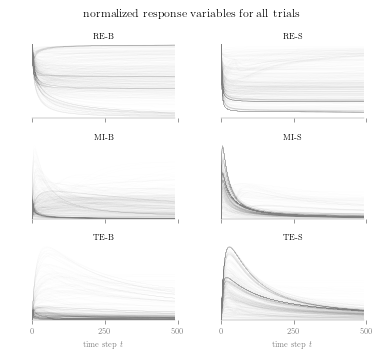

In [37]:
# fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=set_size(textwidth), gridspec_kw={'width_ratios': [7, 1], 'wspace': 0.05}, sharey=True)
MAX_T = 490 ###

def make_time_series_line_plot(ax1, rv):
    for i in range(MIN_TRIAL, MAX_TRIAL+1):
        ax1.plot(data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.05, alpha=0.1)
#         break ###

    ax1.set_title(f'{response_variable_short_labels[rv]}')
#     ax1.set_xlabel('time step $t$', color='grey')

    ax1.set_xticks([0, 250, 500])
    ax1.set_ylim((0, data[MIN_TRIAL:MAX_TRIAL+1, MIN_T:MAX_T+1, rv, INDEX_MEANS].max()))

    # more decoration
    ax1.spines['bottom'].set_color('grey')
    ax1.spines['left'].set_visible(False)

    ax1.tick_params(axis='x', colors='grey')
    ax1.tick_params(axis='y', colors='None')

    ax1.spines['bottom'].set_bounds(MIN_T, MAX_T)

    
fig, axes = plt.subplots(3,2, figsize=set_size(textwidth, subplot=[3,2]), sharex=True)
for rv, ax in enumerate(axes.T.reshape(-1)):
    make_time_series_line_plot(ax, rv)

for col in range(2):
    axes[-1, col].set_xlabel('time step $t$', color='grey')
    
fig.suptitle('normalized response variables for all trials')
fig.tight_layout()
fig.subplots_adjust(top=0.875)


In [77]:
fig.savefig(f'all_time_series_line_plots_tall.pdf', format='pdf', bbox_inches='tight')    

In [38]:
# compositing DTW clusters heatmap together

clusters_df2 = design_df.copy()

mode = 'dtw'

for rv in range(0, 6):
    # load R's cluster indices from file
    with open(f'../{mode}_best_clusters_rv_{rv}.csv', 'r') as f:
        cluster_ids = [int(i) for i in f.readline()[:-1].split(',')]

    clusters_df2[f'cluster_{mode}_{rv}'] = cluster_ids
    
    

FileNotFoundError: [Errno 2] No such file or directory: '../dtw_best_clusters_rv_0.csv'

In [39]:
import string

def get_census_vals(mode, clusters_df):
    output = []
    cluster_nums_dict = dict()
    
    rows = []  # row labels
    for (factor, levels) in factors.items():
        for i, level in enumerate(levels):
            rows.append(f"{string.ascii_lowercase[i]}")  # rows = columns now
        rows.append('')  # blank label for between factors
        
    for rv in range(0, 6):
        census_vals = []  # count of trials with both a given factor-level and cluster number divided by cluster size
        
        cluster_col = f'cluster_{mode}_{rv}'
        cluster_nums = sorted(clusters_df[cluster_col].unique())
        cluster_nums_dict[rv] = cluster_nums
    
        for (factor, levels) in factors.items():
            for i, level in enumerate(levels):
                # "census" of each cluster..."what does each cluster look like?"...take frequency per factor per cluster
                census_vals.append([len(clusters_df[(clusters_df[cluster_col] == cluster_num) & (clusters_df[factor] == level)]) 
                                 / len(clusters_df[(clusters_df[cluster_col] == cluster_num)]) for cluster_num in cluster_nums])

            census_vals.append([np.nan]*len(cluster_nums))  # blank data to render as gap

        census_vals = np.array(census_vals[:-1]).T  # remove last element since it's blank
        output.append(census_vals)
            
    
    return output, np.array(rows[:-1]), cluster_nums_dict
                    

census_output, row_labels, cluster_nums_dict = get_census_vals(mode, clusters_df2)       
nans = [[np.nan]*census_output[0].shape[1] for _ in census_output]



KeyError: 'cluster_dtw_0'

In [40]:
nans = [np.full((1, census_output[0].shape[1]), np.nan) for _ in census_output]

NameError: name 'census_output' is not defined

In [41]:
census_data = np.concatenate([x for t in zip(census_output, nans) for x in t], axis=0)[:-1]
# x for t in zip(...) for x in t   is how you flatten a list of tuples. who knew.

NameError: name 'census_output' is not defined

# Scenario-specific stuff

In [31]:
scenario_num = 2


old_filepath = 'master_trial_results.npy'
old_data = np.load(old_filepath)
old_data[0] = np.nan

new_filepath = scenario_filepaths[scenario_num]
new_data = np.load(new_filepath)
new_data[0] = np.nan

In [32]:
colors = [None, 'orange', 'green', 'yellow', 'blue']
dashes = [None, [25, 25], [10, 10], [30, 5, 10, 5], [5, 10, 25, 5]]

In [33]:
rv = 5
MAX_T = 490


In [34]:
design_df.head()

,agent_activation_regime,influence_error_distribution,influence_model,network_structure_model,population_size
1,synchronous,none,standard_model,erdos_renyi_random(N),100
2,synchronous,none,standard_model,erdos_renyi_random(N),1000
3,synchronous,none,standard_model,erdos_renyi_random(N),10000
4,synchronous,none,standard_model,"small_world(N, 0.0, 3)",100
5,synchronous,none,standard_model,"small_world(N, 0.0, 3)",1000


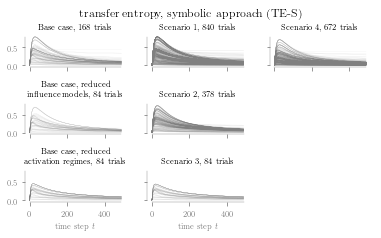

In [70]:
fig1, axes = plt.subplots(3, 3, figsize=set_size(textwidth, subplot=[3,3]), sharey=True, sharex=True)

### need design_df to be loaded using "scenario 0"

s2 = s4 = 0
for i in trial_nums_from_full_design_present_in_nonh_core:
    axes[0, 0].plot(old_data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.15, alpha=0.25)
    
    # Scenario 2 has only SimilarityBias & AttractiveRepulsive
    if design_df.loc[i, 'influence_model'] in ['similarity_bias', 'attractive_repulsive']:
        axes[1, 0].plot(old_data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.15, alpha=0.25)
        s2 += 1
        
    # Scenario 4 has only Random activation regime
    if design_df.loc[i, 'agent_activation_regime'] == 'random':
        axes[2, 0].plot(old_data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.15, alpha=0.25)
        s4 += 1

axes[0, 0].set_title(f'Base case, {len(trial_nums_from_full_design_present_in_nonh_core)} trials')
axes[1, 0].set_title(f'Base case, reduced\ninfluence models, {s2} trials')
axes[2, 0].set_title(f'Base case, reduced\nactivation regimes, {s4} trials')

sc_ax_map = {
    1: 1, 4: 2, 2: 4, 3: 7 
}
    
for scenario_num in [1,2,3,4]:
    ax1 = axes.ravel()[sc_ax_map[scenario_num]]
    
    new_filepath = scenario_filepaths[scenario_num]
    new_data = np.load(new_filepath)
    new_data[0] = np.nan

    for i in range(1, new_data.shape[0]):
        ax1.plot(new_data[i, MIN_T:MAX_T+1, rv, INDEX_MEANS], marker='', color='grey', linewidth=0.15, alpha=0.25)
#         break###
    ax1.set_title(f'Scenario {scenario_num}, {new_data.shape[0]-1} trials')

    
for ax1 in axes.ravel():
    # more decoration
    ax1.spines['bottom'].set_color('grey')
    ax1.spines['left'].set_color('grey')

    ax1.tick_params(axis='x', colors='grey')
    ax1.tick_params(axis='y', colors='grey')

    ax1.spines['bottom'].set_bounds(MIN_T, MAX_T)
    ax1.spines['left'].set_bounds(old_data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].min(), 
                                  old_data[MIN_TRIAL:, MIN_T:MAX_T+1, rv, INDEX_MEANS].max())
    
    
axes[2, 0].set_xlabel('time step $t$', color='grey')    
axes[2, 1].set_xlabel('time step $t$', color='grey')    
# axes[0, 2].set_xlabel('time step $t$', color='grey')    

axes[1, 2].axis('off')    
axes[2, 2].axis('off')    

fig1.suptitle(f'{response_variable_labels[rv]}')
fig1.tight_layout()
fig1.subplots_adjust(top=0.860)

In [81]:
fig1.savefig(f'all_trials_all_scenarios_line_plots_rv_{rv}.pdf', format='pdf', bbox_inches='tight')

In [35]:
# want to plot difference between scenario trial and best-match base case trial
# for Scn 1 & 4, no problem, just ignore scenario--specific factor for match
# for Scn 2, ??
# for Scn 3, match with Random activation regime

# want to show all 4 scenarios on one plot for a single RV using small-multiples approach (4 horizontal axises)...

design_dfs = {}
for i in [0,1,2,3,4]:
    design_dfs[i] = pd.read_csv(f'../code/{scenario_designs[i]}', index_col=0, dtype=str)

In [36]:
def get_matching_base_case_trial_num(scn_trial_num, scn_num, influence_model=None):
    # influence_model arg used only for Scenario 2...I'll plot relative to both SimBias & AttractiveRepulse
    
    scn_trial = design_dfs[scn_num].loc[scn_trial_num]
    
    if scn_num in [1, 4]:
        rows = design_df[(design_df['network_structure_model'] == scn_trial['network_structure_model']) & 
                         (design_df['influence_model'] == scn_trial['influence_model']) &
                         (design_df['influence_error_distribution'] == scn_trial['influence_error_distribution']) &
                         (design_df['agent_activation_regime'] == scn_trial['agent_activation_regime']) & 
                         (design_df['population_size'] == '1000')
                        ]

    elif scn_num == 2:
        rows = design_df[(design_df['network_structure_model'] == scn_trial['network_structure_model']) & 
                         (design_df['influence_model'] == influence_model) &
                         (design_df['influence_error_distribution'] == scn_trial['influence_error_distribution']) &
                         (design_df['agent_activation_regime'] == scn_trial['agent_activation_regime']) & 
                         (design_df['population_size'] == '1000')
                        ]
    
    elif scn_num == 3:
        rows = design_df[(design_df['network_structure_model'] == scn_trial['network_structure_model']) & 
                         (design_df['influence_model'] == scn_trial['influence_model']) &
                         (design_df['influence_error_distribution'] == scn_trial['influence_error_distribution']) &
                         (design_df['agent_activation_regime'] == 'random') & 
                         (design_df['population_size'] == '1000')
                        ]
    
    else:
        print('bad scn_num', scn_num)
        
    ##
#     print(scn_trial)
#     print(rows)
    
    if rows.shape[0] == 0:
        print('no matching rows for', scn_trial_num, scn_num)
    elif rows.shape[0] > 1:
        print('no unique row for', scn_trial_num, scn_num)
    else:
        return rows.first_valid_index()


In [37]:
get_matching_base_case_trial_num(1, 2, 'similarity_bias')

32

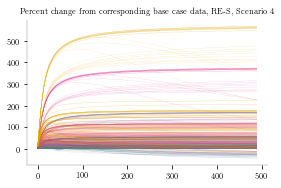

In [74]:
rv = 3
scenario_num = 4

old_filepath = 'master_trial_results.npy'
old_data = np.load(old_filepath)
old_data[0] = np.nan

fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth, subplot=[1,1], fraction=0.8), sharey=True, sharex=True)


new_filepath = scenario_filepaths[scenario_num]
new_data = np.load(new_filepath)
new_data[0] = np.nan

color='grey'

scn_2_colors = {0.25:plt.cm.Dark2.colors[0], 0.33:plt.cm.Dark2.colors[1], 0.50:plt.cm.Dark2.colors[2], 
                0.66:plt.cm.Dark2.colors[3], 0.75:plt.cm.Dark2.colors[4], 0.00:plt.cm.Dark2.colors[5]}
scn_4_colors = {0.05:plt.cm.Dark2.colors[0], 0.15:plt.cm.Dark2.colors[2], 0.33:plt.cm.Dark2.colors[3], 0.50:plt.cm.Dark2.colors[5]}

for i in range(1, new_data.shape[0]):
    if scenario_num == 2:  # special handling
        trial_num1 = get_matching_base_case_trial_num(i, scenario_num, 'similarity_bias')  # concord
        trial_num2 = get_matching_base_case_trial_num(i, scenario_num, 'attractive_repulsive')  # PA
        if trial_num1 is not None and trial_num2 is not None: 
            color = scn_2_colors[float(design_dfs[2].loc[i, 'fraction_concord'])]
            
            fraction_concord = float(design_dfs[scenario_num].loc[i, 'fraction_concord'])
            old_y = fraction_concord * old_data[trial_num1, MIN_T+1:MAX_T+1, rv, INDEX_MEANS] + (1-fraction_concord) * old_data[trial_num2, MIN_T+1:MAX_T+1, rv, INDEX_MEANS]
            y = new_data[i, MIN_T+1:MAX_T+1, rv, INDEX_MEANS] - old_y
            ax1.plot(y/old_y*100, marker='', color=color, linewidth=0.15, alpha=0.5)

    else:
        matching_trial_num = get_matching_base_case_trial_num(i, scenario_num)
        if matching_trial_num is not None:
            if scenario_num == 4:
                color = scn_4_colors[float(design_dfs[4].loc[i, 'fraction_stubborn'])]

            old_y = old_data[matching_trial_num, MIN_T+1:MAX_T+1, rv, INDEX_MEANS]
            y = new_data[i, MIN_T+1:MAX_T+1, rv, INDEX_MEANS] - old_y
            ax1.plot(y/old_y*100, marker='', color=color, linewidth=0.15, alpha=0.5)
            
#             if (y/old_y*100 > 6).any():
#                 print(i)

#     break
    
# ax1.spines['bottom'].set_visible(False)
# # ax1.tick_params(axis='x', colors='none', labelsize=6)    
# ax1.spines['top'].set_position('zero')
# ax1.spines['top'].set_visible(True)
# ax1.xaxis.set_ticks_position('top')

# ax1.set_xticks([0, 500])
# ax1.set_xlabel('time step $t$', color='grey') 

ax1.set_title(f'Percent change from corresponding base case data, {response_variable_short_labels[rv]}, Scenario {scenario_num}');

stubborn_labels = [(0.05, .72), (0.15, .57), (0.33, .35), (0.50, .17)]
if scenario_num == 4 and rv == 4:
    for fs, ypos in stubborn_labels:
        ax1.annotate(f'{fs:0.2}', xy=(1, ypos), xytext=(-4, 0),
            xycoords='axes fraction', textcoords='offset points', size=8, ha='left', va='center')
        
    ax1.annotate('fraction stubborn', xy=(1, 0), xytext=(5, -5),
            xycoords='axes fraction', textcoords='offset points', size=8, ha='right', va='center')
    
    ax1.axvline(x=511, ymin=0.01, ymax=0.12, color='grey', linewidth=0.5, clip_on=False)
    ax1.xaxis.set_label_coords(0.5, 0.90)

In [302]:
# fig1.savefig(f'percent_changes_MI-S_Scn_4.pdf', format='pdf', bbox_inches='tight')

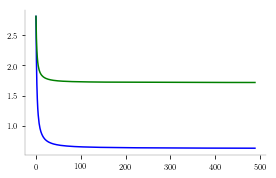

In [75]:
fig1, ax1 = plt.subplots(1, 1, figsize=set_size(textwidth, subplot=[1,1], fraction=0.8), sharey=True, sharex=True)
ax1.plot(old_data[matching_trial_num, :490, rv, INDEX_MEANS], color='blue')
ax1.plot(new_data[i, :490, rv, INDEX_MEANS], color='green')

In [76]:
design_dfs[3].loc[7]

agent_activation_regime              synchronous
influence_error_distribution                none
influence_model                   standard_model
network_structure_model         scale_free(N, 5)
population_size                             1000
Name: 7, dtype: object

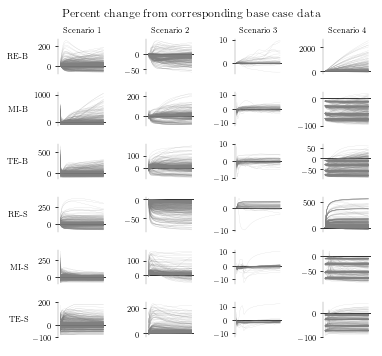

In [43]:
fig1, axes = plt.subplots(6, 4, figsize=set_size(textwidth, subplot=[6,4]), sharey=False, sharex=True)

percent_change_timeseries_container = []  # hey this is inefficient!

for col, scenario_num in enumerate([1,2,3,4]):
    new_filepath = scenario_filepaths[scenario_num]
    new_data = np.load(new_filepath)
    new_data[0] = np.nan

    for rv in range(6):
        ax1 = axes[rv, col]
    
        color='grey'
        ax1.axhline(y=0, color='black', linewidth=0.8, linestyle='-')

        for i in range(1, new_data.shape[0]):
            if scenario_num == 2:  # special handling
                trial_num1 = get_matching_base_case_trial_num(i, scenario_num, 'similarity_bias')  # concord
                trial_num2 = get_matching_base_case_trial_num(i, scenario_num, 'attractive_repulsive')  # PA
                if trial_num1 is not None and trial_num2 is not None:            
                    fraction_concord = float(design_dfs[scenario_num].loc[i, 'fraction_concord'])
                    old_y = fraction_concord * old_data[trial_num1, MIN_T+1:MAX_T+1, rv, INDEX_MEANS] + (1-fraction_concord) * old_data[trial_num2, MIN_T+1:MAX_T+1, rv, INDEX_MEANS]
                    y = new_data[i, MIN_T+1:MAX_T+1, rv, INDEX_MEANS] - old_y
                    ax1.plot(y/old_y*100, marker='', color='grey', linewidth=0.15, alpha=0.50)

            else:
                matching_trial_num = get_matching_base_case_trial_num(i, scenario_num)
                if matching_trial_num is not None:
                    old_y = old_data[matching_trial_num, MIN_T+1:MAX_T+1, rv, INDEX_MEANS]
                    y = new_data[i, MIN_T+1:MAX_T+1, rv, INDEX_MEANS] - old_y
                    ax1.plot(y/old_y*100, marker='', color=color, linewidth=0.15, alpha=0.50)
#             break

            percent_change_timeseries_container.append(y/old_y*100)

        ax1.spines['bottom'].set_visible(False)
        ax1.tick_params(axis='x', colors='none', labelsize=6)
        
        
# format axes...

for c in range(4):
#     axes[5, c].set_xlabel('time step $t$', color='grey')   
    
    axes[0, c].set_title(f'Scenario {c+1}')
    
# axes[5, 0].set_xlabel('time step $t$', color='grey')     # only label it once?
    
pad = 4
for r in range(6):
    ax = axes[r, 0]
    ax.annotate(f'{response_variable_short_labels[r]}', xy=(0, 0.5), 
#                 xytext=(-ax.yaxis.labelpad - pad, 0),
                xytext=(-30, 0),
                xycoords='axes fraction',
                textcoords='offset points',
                size=8, ha='right', va='center')

#  customize ticks
axes[5, 0].set_yticks([200, 0, -100])
        
fig1.suptitle('Percent change from corresponding base case data')
fig1.tight_layout()
fig1.subplots_adjust(top=0.890)

In [307]:
fig1.savefig(f'percent_changes_from_base_case.pdf', format='pdf', bbox_inches='tight')

In [72]:
# some quick analysis on the percent change data
pct = np.array(percent_change_timeseries_container)
print(pct.shape)

# how many rows are all less than 5%?
negligible_threshold = 10 # the data was saved x100, so percent is an integer now
row_count = 0
for row in pct:
    if np.all(np.less(np.abs(row), negligible_threshold)):
        row_count += 1

print(row_count, f"less than {negligible_threshold}%", row_count / pct.shape[0])

# how many rows are any greater than 100%
big_threshold = 100 # the data was saved x100, so percent is an integer now
row_count = 0
for row in pct:
    if np.any(np.greater_equal(np.abs(row), big_threshold)):
        row_count += 1

print(row_count, f"greater than {big_threshold}%", row_count / pct.shape[0])



(11844, 490)
3252 less than 10% 0.2745694022289767
952 greater than 100% 0.08037825059101655


## RV correlations

In [762]:
trial_corrs = np.full((MAX_TRIAL+1, 6, 6), np.nan)

for i in range(MIN_TRIAL, MAX_TRIAL+1):
    for j in range(6):
        for k in range(6):
            if j > k:
                trial_corrs[i, j, k] = np.corrcoef(data[i, MIN_T:MAX_T+1, (j, k), INDEX_MEANS])[0, 1]

print(trial_corrs[1], trial_corrs.shape)

[[        nan         nan         nan         nan         nan         nan]
 [-0.96974399         nan         nan         nan         nan         nan]
 [-0.99087753  0.9866988          nan         nan         nan         nan]
 [ 0.76550574 -0.7021893  -0.72368325         nan         nan         nan]
 [-0.84782427  0.80472533  0.82468849 -0.75822033         nan         nan]
 [-0.92405499  0.83040536  0.86789103 -0.81069519  0.87448351         nan]] (841, 6, 6)


In [777]:
trial_corrs_dict = {}

for scn in [1,2,3,4]:
    scn_data = np.load(scenario_filepaths[scn])
    scn_data[0] = np.nan
    max_trial = trial_counts[scn]
    
    trial_corrs_dict[scn] = np.full((max_trial, 6, 6), np.nan)

    for i in range(1, max_trial+1):
        for j in range(6):
            for k in range(6):
                if j > k:
                    trial_corrs_dict[scn][i-1, j, k] = np.corrcoef(scn_data[i, MIN_T:MAX_T+1, (j, k), INDEX_MEANS])[0, 1]

    
# also add in base case...
old_filepath = 'master_trial_results.npy'
old_data = np.load(old_filepath)
old_data[0] = np.nan

trial_corrs_dict[0] = np.full((len(trial_nums_from_full_design_present_in_nonh_core), 6, 6), np.nan)

for i, t in enumerate(trial_nums_from_full_design_present_in_nonh_core):
    for j in range(6):
        for k in range(6):
            if j > k:
                trial_corrs_dict[0][i, j, k] = np.corrcoef(old_data[t, MIN_T:MAX_T+1, (j, k), INDEX_MEANS])[0, 1]


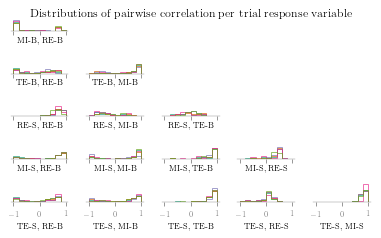

In [796]:
fig, axes = plt.subplots(5,5, figsize=set_size(textwidth, subplot=[5,5]), sharex=True, sharey=True)

bins = np.arange(-1, 1.2, 0.2)
bins[5] = 0

for scn in [0, 1, 2, 3, 4]:
    trial_corrs = trial_corrs_dict[scn]

    for j in range(1, 6):
        for k in range(6-1):
            ax = axes[j-1, k]

            if j > k:
                corr_data = trial_corrs[1:, j, k]
                weights = np.ones_like(corr_data)/corr_data.size
                ax.hist(corr_data, bins=bins, weights=weights, linewidth=1, alpha=0.66, color=cmap.colors[scn], histtype='step')
                ax.set_xlabel(f'{response_variable_short_labels[j]}, {response_variable_short_labels[k]}', size=8)
                ax.get_yaxis().set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.tick_params(axis='x', colors='grey')

            else:
                ax.axis('off')

            
fig.suptitle(f'Distributions of pairwise correlation per trial response variable')
fig.tight_layout()

In [797]:
fig.savefig(f'all_rv_correlation_hist_scenarios.pdf', format='pdf', bbox_inches='tight')    

## Cluster analysis but not like that

In [798]:
# # preprocessing/file manip -- only need to do once for whole experiment

# load each scenario and join into single array for rv 0

rv = 0

# old data first 
old_filepath = 'master_trial_results.npy'
data = np.load(old_filepath)
data = data[trial_nums_from_full_design_present_in_nonh_core]
print("old data (scn 0)", data.shape[0])


for scn in [1,2,3,4]:
    scn_data = np.load(scenario_filepaths[scn])
    scn_data = scn_data[1:]  # remove 0th row, which is always empty
    print("scn ", scn, scn_data.shape[0])
    
    data = np.concatenate((data, scn_data))

print("all data", data.shape[0])
    
np.save(f'split_master_trial_results_rv_{rv}_all_scenarios.npy', data[:, :, rv, INDEX_MEANS] )

old data (scn 0) 168
scn  1 840
scn  2 378
scn  3 84
scn  4 672
all data 2142


In [1000]:
# go run DTW in R...
# ...ok...
    
# construct dataframe with scenario id column
clusters_df = pd.DataFrame(data=-1, index=list(range(1, 2142+1)), columns=['scenario', 'cluster_id'], dtype=int)
scenario_stripes = [
    (1, 168, 0),
    (168+1, 168+1+840-1, 1),
    (168+1+840-1+1, 168+1+840-1+1+378-1, 2), 
    (168+1+840-1+1+378-1+1, 168+1+840-1+1+378-1+1+84-1, 3),
    (168+1+840-1+1+378-1+1+84-1+1, 168+1+840-1+1+378-1+1+84-1+1+672-1, 4)
]

for a, b, scn in scenario_stripes:
    clusters_df.loc[a:b+1, 'scenario'] = scn

In [1001]:
# load R's cluster indices from file
num_clusters = 5
with open(f'dtw_{num_clusters}_clusters_rv_{rv}_all_scenarios.csv', 'r') as f:
    cluster_ids = [int(i) for i in f.readline()[:-1].split(',')]
    
clusters_df['cluster_id'] = cluster_ids
clusters_df['cluster_id'] -= 1  # make "base-0"

In [1002]:
clusters_df['cluster_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [1006]:
# create confusion matrix between actual scenario id and cluster id

confusion_mtx = pd.crosstab(clusters_df['scenario'], clusters_df['cluster_id'], rownames=['Actual Scenario'], colnames=['Assigned Cluster'], margins=False)
normalized_confusion_mtx = confusion_mtx / confusion_mtx.sum(axis=1).to_numpy().reshape(-1, 1)
print(confusion_mtx)

Assigned Cluster    0    1    2    3    4
Actual Scenario                          
0                  44   33   22   19   50
1                 174  234  102  105  225
2                  94  152   77    1   54
3                  22   16   11   10   25
4                  77  104   94   83  314


In [1007]:
from itertools import permutations 

best_accy = -1
best_perm = None
grand_sum = confusion_mtx.sum().sum()
nums = [0, 1, 2, 3, 4]
for perm in permutations(nums):
    test_accy = sum([confusion_mtx.loc[i, j] for i, j in zip(nums, perm)]) / grand_sum
#     print(perm, test_accy)
    if test_accy > best_accy:
        best_accy = test_accy
        best_perm = perm

print(best_accy, best_perm)


0.31699346405228757 (0, 1, 2, 3, 4)


In [1005]:
# choose different cluster label to reduce confusion (R doesn't know about scenario numbers)
def apply_permutation(perm_dict, df, col):
    df['tmp'] = None
    for k, v in perm_dict.items():
        df.loc[df[col] == k, 'tmp'] = v
        
    df[col] = df['tmp']
    df.drop('tmp', axis=1, inplace=True)    
    
    
perm_dict = {0:3,
             1:4, 
             2:2, 
             3:0, 
             4:1}  # k:v = cluster id assigned in R:cluster id I'm switching that to
apply_permutation(perm_dict, clusters_df, 'cluster_id')

# ... then rebuild confusion matrix

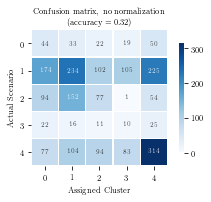

In [1008]:
fig, ax = plt.subplots(1, 1, figsize=set_size(textwidth, fraction=0.75))

accuracy = sum([confusion_mtx.loc[i, i] for i in [0,1,2,3,4]]) / confusion_mtx.sum().sum()

sns.heatmap(confusion_mtx, ax=ax, cmap=plt.cm.Blues, square=True, linewidths=0.25, 
            cbar_kws={'shrink':0.80, 'ticks':[0, 100, 200, 300]},            
            annot=True, fmt="d", annot_kws={'fontsize':6, 'alpha':0.85})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title(f'Confusion matrix, no normalization\n(accuracy $={accuracy:.2f}$)');


In [1009]:
fig.savefig(f'confusion_matrix_cluster_scenarios.pdf', format='pdf', bbox_inches='tight')

Text(0.5, 1.0, 'Normalized confusion matrix\n(accuracy=0.32)')

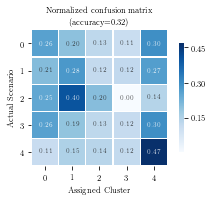

In [1010]:
fig, ax = plt.subplots(1, 1, figsize=set_size(textwidth, fraction=0.75))

# want to calculate accy off of raw values, not normalized.
# accuracy = sum([normalized_confusion_mtx.loc[i, i] for i in [0,1,2,3,4]]) / normalized_confusion_mtx.sum().sum()

sns.heatmap(normalized_confusion_mtx, ax=ax, cmap=plt.cm.Blues, square=True, linewidths=0.25,
            cbar_kws={'shrink':0.80, 'ticks':[0.0, 0.15, 0.3, 0.45]},          
           annot=True, fmt=".2f", annot_kws={'fontsize':6, 'alpha':0.85})
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title(f'Normalized confusion matrix\n(accuracy={accuracy:.2f})')

In [1011]:
fig.savefig(f'confusion_matrix_normalized_cluster_scenarios.pdf', format='pdf', bbox_inches='tight')

In [1012]:
# compare cluster sizes
print(confusion_mtx.sum(axis=0), confusion_mtx.sum(axis=1), confusion_mtx.sum(axis=0)/confusion_mtx.sum(axis=1))

Assigned Cluster
0    411
1    539
2    306
3    218
4    668
dtype: int64 Actual Scenario
0    168
1    840
2    378
3     84
4    672
dtype: int64 Assigned Cluster
0    2.446429
1    0.641667
2    0.809524
3    2.595238
4    0.994048
dtype: float64
